In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from datetime import timedelta
import matplotlib.dates as mdates
plt.rc('font', family='NanumBarunGothic') 

#에러 제거
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
click = pd.read_csv('model2_new_session_id.csv')

In [3]:
click.head()

,session_id,event_name,event_time,event_id,traffic_source,product_id,quantity,item_price,payment_status,search_keywords,promo_code,promo_amount,session_t
0,00001f29-3ede-4445-95f0-0178934e32ba_1,HOMEPAGE,2019-05-17 11:51:52.276396+00:00,51793173-664c-4557-8a06-fc37587bea3d,MOBILE,0,0,0,NaN,NaN,nopromo,0,0 days 00:00:00
1,00001f29-3ede-4445-95f0-0178934e32ba_2,ADD_TO_CART,2019-05-17 19:54:53.276396+00:00,517b331c-4296-4772-a1a2-9bf7500a5570,MOBILE,33855,6,237967,NaN,NaN,nopromo,0,0 days 00:00:19
2,00001f29-3ede-4445-95f0-0178934e32ba_2,HOMEPAGE,2019-05-17 19:55:12.276396+00:00,2c0581d2-3185-4172-87ea-795ee26a4d0a,MOBILE,0,0,0,NaN,NaN,nopromo,0,0 days 00:00:19
3,00001f29-3ede-4445-95f0-0178934e32ba_3,CLICK,2019-05-18 03:58:25.276396+00:00,81982a1d-5562-44e8-8b1d-1c3366434c5e,MOBILE,0,0,0,NaN,NaN,nopromo,0,0 days 00:00:00
4,00001f29-3ede-4445-95f0-0178934e32ba_4,CLICK,2019-05-18 12:02:44.276396+00:00,6f7980bf-dce4-4b1e-9ffa-5c37499c4dc7,MOBILE,0,0,0,NaN,NaN,nopromo,0,0 days 00:00:00


In [4]:
df = click.copy()

In [5]:
df.head()

,session_id,event_name,event_time,event_id,traffic_source,product_id,quantity,item_price,payment_status,search_keywords,promo_code,promo_amount,session_t
0,00001f29-3ede-4445-95f0-0178934e32ba_1,HOMEPAGE,2019-05-17 11:51:52.276396+00:00,51793173-664c-4557-8a06-fc37587bea3d,MOBILE,0,0,0,NaN,NaN,nopromo,0,0 days 00:00:00
1,00001f29-3ede-4445-95f0-0178934e32ba_2,ADD_TO_CART,2019-05-17 19:54:53.276396+00:00,517b331c-4296-4772-a1a2-9bf7500a5570,MOBILE,33855,6,237967,NaN,NaN,nopromo,0,0 days 00:00:19
2,00001f29-3ede-4445-95f0-0178934e32ba_2,HOMEPAGE,2019-05-17 19:55:12.276396+00:00,2c0581d2-3185-4172-87ea-795ee26a4d0a,MOBILE,0,0,0,NaN,NaN,nopromo,0,0 days 00:00:19
3,00001f29-3ede-4445-95f0-0178934e32ba_3,CLICK,2019-05-18 03:58:25.276396+00:00,81982a1d-5562-44e8-8b1d-1c3366434c5e,MOBILE,0,0,0,NaN,NaN,nopromo,0,0 days 00:00:00
4,00001f29-3ede-4445-95f0-0178934e32ba_4,CLICK,2019-05-18 12:02:44.276396+00:00,6f7980bf-dce4-4b1e-9ffa-5c37499c4dc7,MOBILE,0,0,0,NaN,NaN,nopromo,0,0 days 00:00:00


In [6]:
df.tail()

,session_id,event_name,event_time,event_id,traffic_source,product_id,quantity,item_price,payment_status,search_keywords,promo_code,promo_amount,session_t
12833597,fffffaf6-55ee-428b-a3bf-075cd7f1a093_8470219,ITEM_DETAIL,2018-08-20 13:46:27.790374+00:00,0f3593ec-5341-4cee-b119-79dfd266911a,MOBILE,0,0,0,NaN,NaN,nopromo,0,0 days 00:00:00
12833598,fffffaf6-55ee-428b-a3bf-075cd7f1a093_8470220,ITEM_DETAIL,2018-08-22 09:00:29.790374+00:00,24415771-d466-41a1-8cfb-aa6dc8f6cb40,MOBILE,0,0,0,NaN,NaN,nopromo,0,0 days 00:00:00
12833599,fffffaf6-55ee-428b-a3bf-075cd7f1a093_8470221,ITEM_DETAIL,2018-08-24 04:20:30.790374+00:00,d52f1455-633d-448b-a704-c68ac1bd8156,MOBILE,0,0,0,NaN,NaN,nopromo,0,0 days 00:00:00
12833600,fffffaf6-55ee-428b-a3bf-075cd7f1a093_8470222,PROMO_PAGE,2018-08-25 23:35:58.790374+00:00,7689a2ca-e91e-4f79-97ae-f702c153ed6b,MOBILE,0,0,0,NaN,NaN,nopromo,0,0 days 00:00:00
12833601,fffffaf6-55ee-428b-a3bf-075cd7f1a093_8470223,CLICK,2018-08-27 18:51:50.790374+00:00,37eb4f78-92aa-4114-9e9c-7590a868c809,MOBILE,0,0,0,NaN,NaN,nopromo,0,0 days 00:00:00


In [7]:
#정보확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12833602 entries, 0 to 12833601
Data columns (total 13 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   session_id       object
 1   event_name       object
 2   event_time       object
 3   event_id         object
 4   traffic_source   object
 5   product_id       int64 
 6   quantity         int64 
 7   item_price       int64 
 8   payment_status   object
 9   search_keywords  object
 10  promo_code       object
 11  promo_amount     int64 
 12  session_t        object
dtypes: int64(4), object(9)
memory usage: 1.2+ GB


In [8]:
#섹션 재정의
df = df.rename(columns={'session_id': 'new_session_id'})
df['session_id'] = df['new_session_id'].apply(lambda x: x[:36])

In [9]:
max_session_value = df['session_t'].max()
print("최고 session 값:", max_session_value)

최고 session 값: 8 days 10:30:43


In [10]:
dfdf = df.copy()

In [11]:
dfdf.head(50)

,new_session_id,event_name,event_time,event_id,traffic_source,product_id,quantity,item_price,payment_status,search_keywords,promo_code,promo_amount,session_t,session_id
0,00001f29-3ede-4445-95f0-0178934e32ba_1,HOMEPAGE,2019-05-17 11:51:52.276396+00:00,51793173-664c-4557-8a06-fc37587bea3d,MOBILE,0,0,0,NaN,NaN,nopromo,0,0 days 00:00:00,00001f29-3ede-4445-95f0-0178934e32ba
1,00001f29-3ede-4445-95f0-0178934e32ba_2,ADD_TO_CART,2019-05-17 19:54:53.276396+00:00,517b331c-4296-4772-a1a2-9bf7500a5570,MOBILE,33855,6,237967,NaN,NaN,nopromo,0,0 days 00:00:19,00001f29-3ede-4445-95f0-0178934e32ba
2,00001f29-3ede-4445-95f0-0178934e32ba_2,HOMEPAGE,2019-05-17 19:55:12.276396+00:00,2c0581d2-3185-4172-87ea-795ee26a4d0a,MOBILE,0,0,0,NaN,NaN,nopromo,0,0 days 00:00:19,00001f29-3ede-4445-95f0-0178934e32ba
3,00001f29-3ede-4445-95f0-0178934e32ba_3,CLICK,2019-05-18 03:58:25.276396+00:00,81982a1d-5562-44e8-8b1d-1c3366434c5e,MOBILE,0,0,0,NaN,NaN,nopromo,0,0 days 00:00:00,00001f29-3ede-4445-95f0-0178934e32ba
4,00001f29-3ede-4445-95f0-0178934e32ba_4,CLICK,2019-05-18 12:02:44.276396+00:00,6f7980bf-dce4-4b1e-9ffa-5c37499c4dc7,MOBILE,0,0,0,NaN,NaN,nopromo,0,0 days 00:00:00,00001f29-3ede-4445-95f0-0178934e32ba
5,00001f29-3ede-4445-95f0-0178934e32ba_5,ITEM_DETAIL,2019-05-18 20:04:54.276396+00:00,02d7e74f-3f96-41ab-9a5d-26c2ee392f06,MOBILE,0,0,0,NaN,NaN,nopromo,0,0 days 00:00:00,00001f29-3ede-4445-95f0-0178934e32ba
6,00001f29-3ede-4445-95f0-0178934e32ba_6,SCROLL,2019-05-19 04:07:20.276396+00:00,9d1755ae-3f46-4082-b484-19ac5143e670,MOBILE,0,0,0,NaN,NaN,nopromo,0,0 days 00:00:00,00001f29-3ede-4445-95f0-0178934e32ba
7,00001f29-3ede-4445-95f0-0178934e32ba_7,BOOKING,2019-05-19 20:17:04.276396+00:00,e0d13c13-b9ca-4ea7-9560-78a47f45a20b,MOBILE,0,0,0,Success,NaN,nopromo,0,0 days 00:00:00,00001f29-3ede-4445-95f0-0178934e32ba
8,00003eca-954b-4150-aee1-63fc62f395cf_7,HOMEPAGE,2019-08-24 05:47:16.849738+00:00,0fd587a6-8f32-4f54-829d-16c3cbae0b39,MOBILE,0,0,0,NaN,NaN,nopromo,0,0 days 00:38:55.812606,00003eca-954b-4150-aee1-63fc62f395cf
9,00003eca-954b-4150-aee1-63fc62f395cf_7,PROMO_PAGE,2019-08-24 05:59:38.849738+00:00,fe17d343-3f20-4256-b5ad-7cb270458221,MOBILE,0,0,0,NaN,NaN,nopromo,0,0 days 00:38:55.812606,00003eca-954b-4150-aee1-63fc62f395cf


In [12]:
# product 분석을 위해 불필요한 컬럼 삭제
dfdf.drop(columns=['quantity','promo_amount', 'traffic_source', 'item_price',
'promo_code', 'promo_amount'], inplace=True)

In [13]:
dfdf.head()

,new_session_id,event_name,event_time,event_id,product_id,payment_status,search_keywords,session_t,session_id
0,00001f29-3ede-4445-95f0-0178934e32ba_1,HOMEPAGE,2019-05-17 11:51:52.276396+00:00,51793173-664c-4557-8a06-fc37587bea3d,0,NaN,NaN,0 days 00:00:00,00001f29-3ede-4445-95f0-0178934e32ba
1,00001f29-3ede-4445-95f0-0178934e32ba_2,ADD_TO_CART,2019-05-17 19:54:53.276396+00:00,517b331c-4296-4772-a1a2-9bf7500a5570,33855,NaN,NaN,0 days 00:00:19,00001f29-3ede-4445-95f0-0178934e32ba
2,00001f29-3ede-4445-95f0-0178934e32ba_2,HOMEPAGE,2019-05-17 19:55:12.276396+00:00,2c0581d2-3185-4172-87ea-795ee26a4d0a,0,NaN,NaN,0 days 00:00:19,00001f29-3ede-4445-95f0-0178934e32ba
3,00001f29-3ede-4445-95f0-0178934e32ba_3,CLICK,2019-05-18 03:58:25.276396+00:00,81982a1d-5562-44e8-8b1d-1c3366434c5e,0,NaN,NaN,0 days 00:00:00,00001f29-3ede-4445-95f0-0178934e32ba
4,00001f29-3ede-4445-95f0-0178934e32ba_4,CLICK,2019-05-18 12:02:44.276396+00:00,6f7980bf-dce4-4b1e-9ffa-5c37499c4dc7,0,NaN,NaN,0 days 00:00:00,00001f29-3ede-4445-95f0-0178934e32ba


In [14]:
# 'created_at' 컬럼을 datetime 형식으로 변경
dfdf['event_time2'] = pd.to_datetime(dfdf['event_time'])

# 'created_at' 컬럼을 년도와 월로 나누기
dfdf['year'] = dfdf['event_time2'].dt.year
dfdf['month'] = dfdf['event_time2'].dt.month
dfdf['day'] = dfdf['event_time2'].dt.day

In [15]:
dfdf.head()

,new_session_id,event_name,event_time,event_id,product_id,payment_status,search_keywords,session_t,session_id,event_time2,year,month,day
0,00001f29-3ede-4445-95f0-0178934e32ba_1,HOMEPAGE,2019-05-17 11:51:52.276396+00:00,51793173-664c-4557-8a06-fc37587bea3d,0,NaN,NaN,0 days 00:00:00,00001f29-3ede-4445-95f0-0178934e32ba,2019-05-17 11:51:52.276396+00:00,2019,5,17
1,00001f29-3ede-4445-95f0-0178934e32ba_2,ADD_TO_CART,2019-05-17 19:54:53.276396+00:00,517b331c-4296-4772-a1a2-9bf7500a5570,33855,NaN,NaN,0 days 00:00:19,00001f29-3ede-4445-95f0-0178934e32ba,2019-05-17 19:54:53.276396+00:00,2019,5,17
2,00001f29-3ede-4445-95f0-0178934e32ba_2,HOMEPAGE,2019-05-17 19:55:12.276396+00:00,2c0581d2-3185-4172-87ea-795ee26a4d0a,0,NaN,NaN,0 days 00:00:19,00001f29-3ede-4445-95f0-0178934e32ba,2019-05-17 19:55:12.276396+00:00,2019,5,17
3,00001f29-3ede-4445-95f0-0178934e32ba_3,CLICK,2019-05-18 03:58:25.276396+00:00,81982a1d-5562-44e8-8b1d-1c3366434c5e,0,NaN,NaN,0 days 00:00:00,00001f29-3ede-4445-95f0-0178934e32ba,2019-05-18 03:58:25.276396+00:00,2019,5,18
4,00001f29-3ede-4445-95f0-0178934e32ba_4,CLICK,2019-05-18 12:02:44.276396+00:00,6f7980bf-dce4-4b1e-9ffa-5c37499c4dc7,0,NaN,NaN,0 days 00:00:00,00001f29-3ede-4445-95f0-0178934e32ba,2019-05-18 12:02:44.276396+00:00,2019,5,18


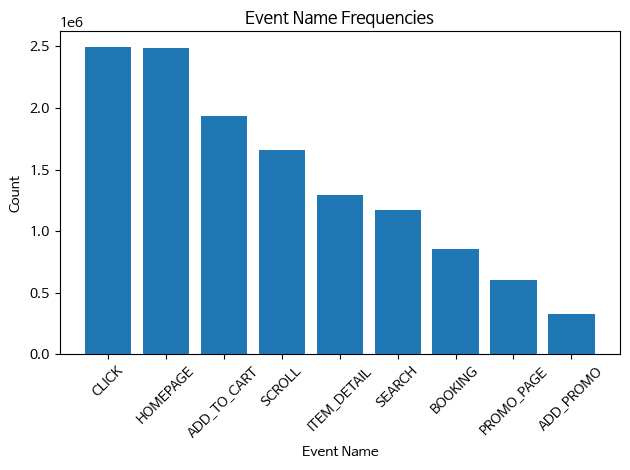

In [16]:
# 'event_name' 컬럼의 값들의 빈도 계산
event_counts = dfdf['event_name'].value_counts()

# 막대 그래프로 시각화
plt.bar(event_counts.index, event_counts.values)
plt.xlabel('Event Name')
plt.ylabel('Count')
plt.title('Event Name Frequencies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

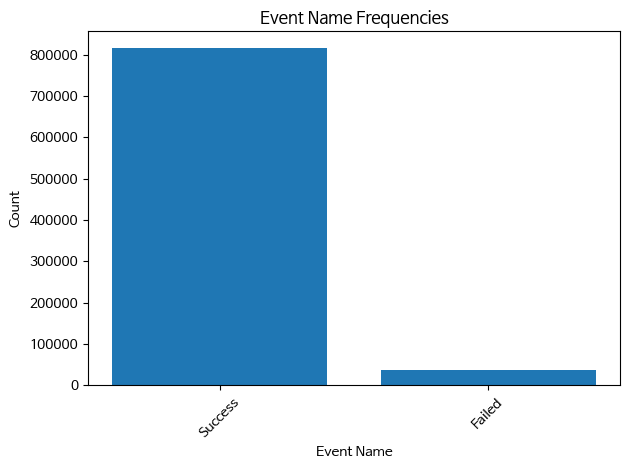

In [17]:
# 'event_name' 컬럼의 값들의 빈도 계산
event_counts = dfdf['payment_status'].value_counts()

# 막대 그래프로 시각화
plt.bar(event_counts.index, event_counts.values)
plt.xlabel('Event Name')
plt.ylabel('Count')
plt.title('Event Name Frequencies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
# 'payment_status' 컬럼이 'Success'인 행에 대해서만 구매를 완료한 사용자 수와 총 사용자 수 계산
purchase_users = dfdf[(dfdf['event_name'] == 'BOOKING') & (dfdf['payment_status'] == 'Success')]['new_session_id'].nunique()
total_users = dfdf['new_session_id'].nunique()

# 구매전환율 계산
conversion_rate = (purchase_users / total_users) * 100

print(f"구매전환율: {conversion_rate:.2f}%")

구매전환율: 8.71%


In [19]:
# 각 년도별로 구매전환율 계산
conversion_rates_by_year = dfdf[(dfdf['event_name'] == 'BOOKING') & (dfdf['payment_status'] == 'Success')].groupby('year')['new_session_id'].nunique() / dfdf.groupby('year')['new_session_id'].nunique() * 100

print(conversion_rates_by_year)

year
2016    12.999298
2017     9.593987
2018     8.948963
2019     8.709349
2020     8.604036
2021     8.540080
2022     8.745034
Name: new_session_id, dtype: float64


In [20]:
# 각 년월별로 구매전환율 계산
conversion_rates_by_year_month = dfdf[(dfdf['event_name'] == 'BOOKING') & (dfdf['payment_status'] == 'Success')].groupby(['year', 'month'])['new_session_id'].nunique() / dfdf.groupby(['year', 'month'])['new_session_id'].nunique() * 100

print(conversion_rates_by_year_month)

year  month
2016  6        100.000000
      7         36.610608
      8         22.880984
      9         13.934593
      10        13.498505
                  ...    
2022  4          8.475013
      5          8.481695
      6          8.747692
      7         10.427804
      8               NaN
Name: new_session_id, Length: 75, dtype: float64


In [21]:
# 년월일별로 구매전환율 계산
conversion_rates_by_year_month_day = dfdf[(dfdf['event_name'] == 'BOOKING') & (dfdf['payment_status'] == 'Success')].groupby(['year', 'month', 'day'])['new_session_id'].nunique() / dfdf.groupby(['year', 'month', 'day'])['new_session_id'].nunique() * 100

print(conversion_rates_by_year_month_day)

year  month  day
2016  6      30     100.000000
      7      1      100.000000
             2       71.428571
             3       88.888889
             4       92.857143
                       ...    
2022  7      28      14.078624
             29      13.171729
             30      18.986958
             31      29.100946
      8      1             NaN
Name: new_session_id, Length: 2224, dtype: float64


In [22]:
conversion_rates_by_year_month_day.head()

year  month  day
2016  6      30     100.000000
      7      1      100.000000
             2       71.428571
             3       88.888889
             4       92.857143
Name: new_session_id, dtype: float64

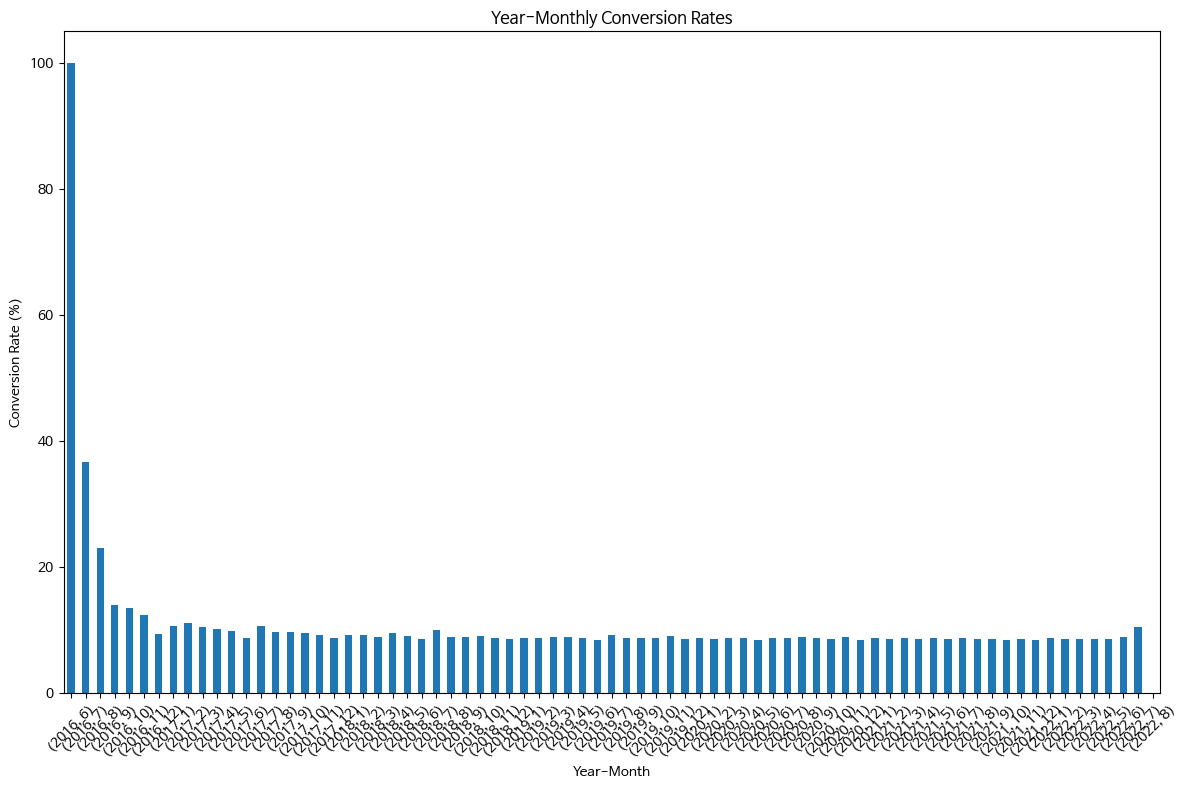

In [23]:
# 각 년월별로 구매전환율 계산
conversion_rates_by_year_month = dfdf[(dfdf['event_name'] == 'BOOKING') & (dfdf['payment_status'] == 'Success')].groupby(['year', 'month'])['new_session_id'].nunique() / dfdf.groupby(['year', 'month'])['new_session_id'].nunique() * 100

# 그래프로 시각화
plt.figure(figsize=(12, 8))
conversion_rates_by_year_month.plot(kind='bar')
plt.xlabel('Year-Month')
plt.ylabel('Conversion Rate (%)')
plt.title('Year-Monthly Conversion Rates')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

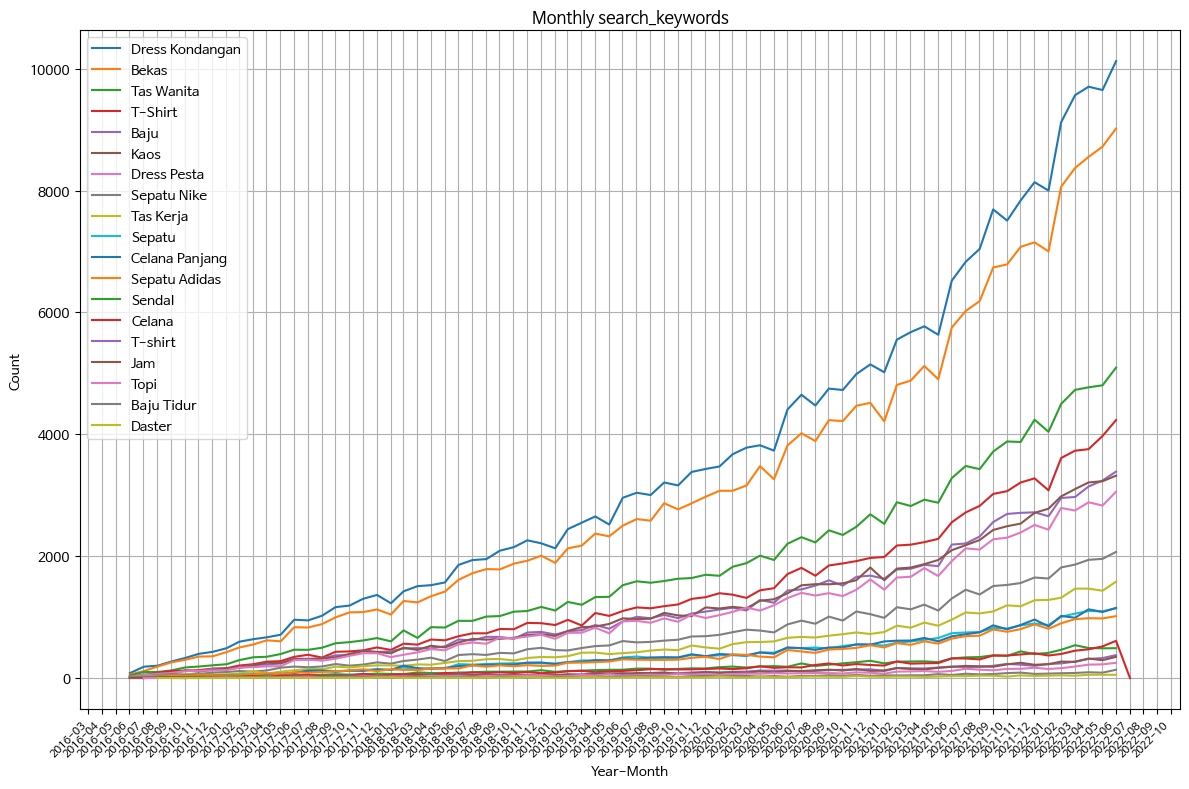

In [24]:
# 월별 거래 수 계산
monthly_transactions_success = dfdf.groupby(['year', 'month', 'search_keywords']).size().reset_index(name='success_count')

# 각 카테고리별 거래 수 합계 계산
category_counts = monthly_transactions_success.groupby('search_keywords')['success_count'].sum().sort_values(ascending=False)
sorted_categories = category_counts.index.tolist()

# 그래프 생성
plt.figure(figsize=(12, 8))

# 각 카테고리 데이터별로 그래프 생성
for category in sorted_categories:
    category_data = monthly_transactions_success[monthly_transactions_success['search_keywords'] == category]
    
    merged_year_month_category = category_data['year'].astype(str) + '-' + category_data['month'].astype(str)
    category_data['merged_year_month'] = pd.to_datetime(merged_year_month_category, format='%Y-%m')
    category_data = category_data.sort_values('merged_year_month')
    
    plt.plot(category_data['merged_year_month'], category_data['success_count'], label=category)

plt.title('Monthly search_keywords')
plt.xlabel('Year-Month')
plt.ylabel('Count')

plt.grid(True)  # 그리드 표시
plt.legend()  # 범례 표시

# x축에 년과 월을 함께 표시하며, 눈금 간격과 회전 설정
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=-1))  # 월별 마지막 날을 눈금으로 설정
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xticks(rotation=45, ha='right', fontsize=8)  # 월까지 표시되는 방식과 x축 눈금(rotation) 설정
plt.tight_layout()

plt.show()

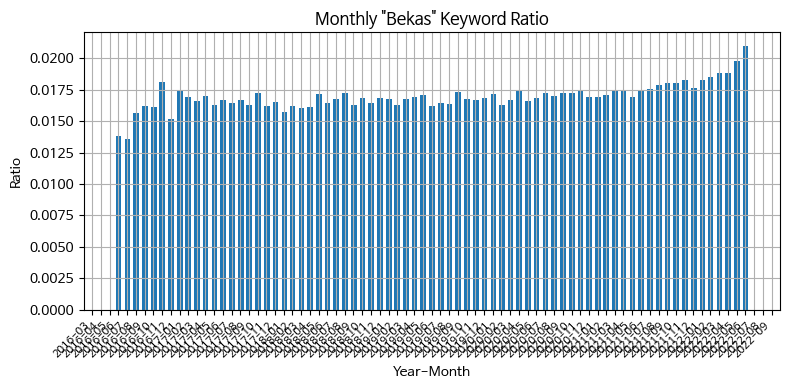

In [25]:
# 월별 거래 수 계산
monthly_transactions = dfdf.groupby(['year', 'month']).size().reset_index(name='total_count')

# 'Bekas' 키워드의 비율 계산
bekas_counts = dfdf[dfdf['search_keywords'] == 'Bekas'].groupby(['year', 'month']).size().reset_index(name='bekas_count')
merged_counts = monthly_transactions.merge(bekas_counts, on=['year', 'month'], how='left')
merged_counts['bekas_ratio'] = merged_counts['bekas_count'] / merged_counts['total_count']

# 그래프 생성
plt.figure(figsize=(8, 4))

merged_counts['merged_year_month'] = pd.to_datetime(merged_counts['year'].astype(str) + '-' + merged_counts['month'].astype(str), format='%Y-%m')
merged_counts = merged_counts.sort_values('merged_year_month')

plt.bar(merged_counts['merged_year_month'], merged_counts['bekas_ratio'], width=20)  # 바 형태로 변경, 너비 조절 가능

plt.title('Monthly "Bekas" Keyword Ratio')
plt.xlabel('Year-Month')
plt.ylabel('Ratio')

plt.grid(True)

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=-1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xticks(rotation=45, ha='right', fontsize=8)
plt.tight_layout()

plt.show()

In [26]:
dfdf.head()

,new_session_id,event_name,event_time,event_id,product_id,payment_status,search_keywords,session_t,session_id,event_time2,year,month,day
0,00001f29-3ede-4445-95f0-0178934e32ba_1,HOMEPAGE,2019-05-17 11:51:52.276396+00:00,51793173-664c-4557-8a06-fc37587bea3d,0,NaN,NaN,0 days 00:00:00,00001f29-3ede-4445-95f0-0178934e32ba,2019-05-17 11:51:52.276396+00:00,2019,5,17
1,00001f29-3ede-4445-95f0-0178934e32ba_2,ADD_TO_CART,2019-05-17 19:54:53.276396+00:00,517b331c-4296-4772-a1a2-9bf7500a5570,33855,NaN,NaN,0 days 00:00:19,00001f29-3ede-4445-95f0-0178934e32ba,2019-05-17 19:54:53.276396+00:00,2019,5,17
2,00001f29-3ede-4445-95f0-0178934e32ba_2,HOMEPAGE,2019-05-17 19:55:12.276396+00:00,2c0581d2-3185-4172-87ea-795ee26a4d0a,0,NaN,NaN,0 days 00:00:19,00001f29-3ede-4445-95f0-0178934e32ba,2019-05-17 19:55:12.276396+00:00,2019,5,17
3,00001f29-3ede-4445-95f0-0178934e32ba_3,CLICK,2019-05-18 03:58:25.276396+00:00,81982a1d-5562-44e8-8b1d-1c3366434c5e,0,NaN,NaN,0 days 00:00:00,00001f29-3ede-4445-95f0-0178934e32ba,2019-05-18 03:58:25.276396+00:00,2019,5,18
4,00001f29-3ede-4445-95f0-0178934e32ba_4,CLICK,2019-05-18 12:02:44.276396+00:00,6f7980bf-dce4-4b1e-9ffa-5c37499c4dc7,0,NaN,NaN,0 days 00:00:00,00001f29-3ede-4445-95f0-0178934e32ba,2019-05-18 12:02:44.276396+00:00,2019,5,18


In [27]:
dfdf.sort_values(['new_session_id', 'event_time'], inplace=True)

In [28]:
dfdf['next_event'] = dfdf.groupby('new_session_id')['event_name'].shift(-1)

In [29]:
dfdf.head()

,new_session_id,event_name,event_time,event_id,product_id,payment_status,search_keywords,session_t,session_id,event_time2,year,month,day,next_event
0,00001f29-3ede-4445-95f0-0178934e32ba_1,HOMEPAGE,2019-05-17 11:51:52.276396+00:00,51793173-664c-4557-8a06-fc37587bea3d,0,NaN,NaN,0 days 00:00:00,00001f29-3ede-4445-95f0-0178934e32ba,2019-05-17 11:51:52.276396+00:00,2019,5,17,NaN
1,00001f29-3ede-4445-95f0-0178934e32ba_2,ADD_TO_CART,2019-05-17 19:54:53.276396+00:00,517b331c-4296-4772-a1a2-9bf7500a5570,33855,NaN,NaN,0 days 00:00:19,00001f29-3ede-4445-95f0-0178934e32ba,2019-05-17 19:54:53.276396+00:00,2019,5,17,HOMEPAGE
2,00001f29-3ede-4445-95f0-0178934e32ba_2,HOMEPAGE,2019-05-17 19:55:12.276396+00:00,2c0581d2-3185-4172-87ea-795ee26a4d0a,0,NaN,NaN,0 days 00:00:19,00001f29-3ede-4445-95f0-0178934e32ba,2019-05-17 19:55:12.276396+00:00,2019,5,17,NaN
3,00001f29-3ede-4445-95f0-0178934e32ba_3,CLICK,2019-05-18 03:58:25.276396+00:00,81982a1d-5562-44e8-8b1d-1c3366434c5e,0,NaN,NaN,0 days 00:00:00,00001f29-3ede-4445-95f0-0178934e32ba,2019-05-18 03:58:25.276396+00:00,2019,5,18,NaN
4,00001f29-3ede-4445-95f0-0178934e32ba_4,CLICK,2019-05-18 12:02:44.276396+00:00,6f7980bf-dce4-4b1e-9ffa-5c37499c4dc7,0,NaN,NaN,0 days 00:00:00,00001f29-3ede-4445-95f0-0178934e32ba,2019-05-18 12:02:44.276396+00:00,2019,5,18,NaN


In [30]:
bekas_data = dfdf[dfdf['search_keywords'] == 'Bekas']

In [31]:
bekas_data['next_event'].fillna('leave', inplace=True)

In [32]:
bekas_data.head()

,new_session_id,event_name,event_time,event_id,product_id,payment_status,search_keywords,session_t,session_id,event_time2,year,month,day,next_event
152,00007415-e0e7-4a33-95e8-5bc749016876_24,SEARCH,2022-07-24 13:16:37.038087+00:00,e599d7c6-cc51-407b-b8c5-20545cce6cbd,0,NaN,Bekas,0 days 00:04:19,00007415-e0e7-4a33-95e8-5bc749016876,2022-07-24 13:16:37.038087+00:00,2022,7,24,BOOKING
192,0000b1a6-8dca-4fb3-b1db-ccde1791a330_47,SEARCH,2021-02-08 06:31:46.386424+00:00,bf979aa8-67f2-4639-adfb-6cddbf25dccb,0,NaN,Bekas,0 days 00:00:00,0000b1a6-8dca-4fb3-b1db-ccde1791a330,2021-02-08 06:31:46.386424+00:00,2021,2,8,leave
313,00011e77-643b-49ba-b09d-c5a64f7683b4_150,SEARCH,2018-05-25 22:40:31.211903+00:00,7acacdd8-9d65-4d51-9ac0-3d828fd86b6d,0,NaN,Bekas,0 days 02:53:07,00011e77-643b-49ba-b09d-c5a64f7683b4,2018-05-25 22:40:31.211903+00:00,2018,5,25,ADD_TO_CART
387,00013ac1-f66e-492c-ac04-4e0f1ecf2ff8_184,SEARCH,2020-02-13 03:41:13.777605+00:00,46290a42-6762-4eaa-8eef-c69bdb3bd413,0,NaN,Bekas,0 days 00:00:00,00013ac1-f66e-492c-ac04-4e0f1ecf2ff8,2020-02-13 03:41:13.777605+00:00,2020,2,13,leave
390,00013ac1-f66e-492c-ac04-4e0f1ecf2ff8_187,SEARCH,2020-02-13 14:30:48.777605+00:00,ce57b770-5552-44f1-bff8-1d6e37e24118,0,NaN,Bekas,0 days 00:00:00,00013ac1-f66e-492c-ac04-4e0f1ecf2ff8,2020-02-13 14:30:48.777605+00:00,2020,2,13,leave


In [33]:
bekas_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 224882 entries, 152 to 12833586
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   new_session_id   224882 non-null  object             
 1   event_name       224882 non-null  object             
 2   event_time       224882 non-null  object             
 3   event_id         224882 non-null  object             
 4   product_id       224882 non-null  int64              
 5   payment_status   0 non-null       object             
 6   search_keywords  224882 non-null  object             
 7   session_t        224882 non-null  object             
 8   session_id       224882 non-null  object             
 9   event_time2      224882 non-null  datetime64[ns, UTC]
 10  year             224882 non-null  int32              
 11  month            224882 non-null  int32              
 12  day              224882 non-null  int32              
 13  

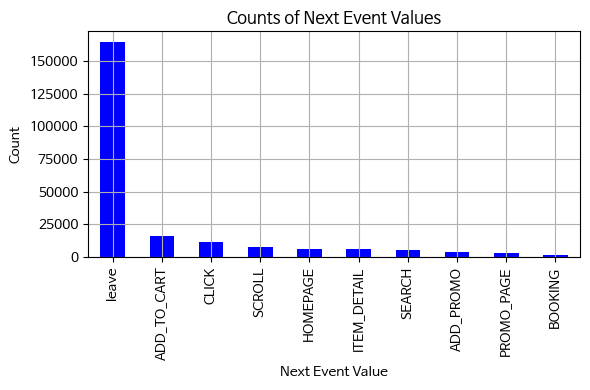

In [34]:
# next_event 컬럼 값의 데이터 수를 카운트
next_event_counts = bekas_data['next_event'].value_counts()

# 그래프 생성
plt.figure(figsize=(6, 4))
next_event_counts.plot(kind='bar', color='b')

plt.title('Counts of Next Event Values')
plt.xlabel('Next Event Value')
plt.ylabel('Count')

plt.grid(True)
plt.tight_layout()

plt.show()

In [35]:
filtered_df = bekas_data[bekas_data['year'].isin([2021, 2022])]

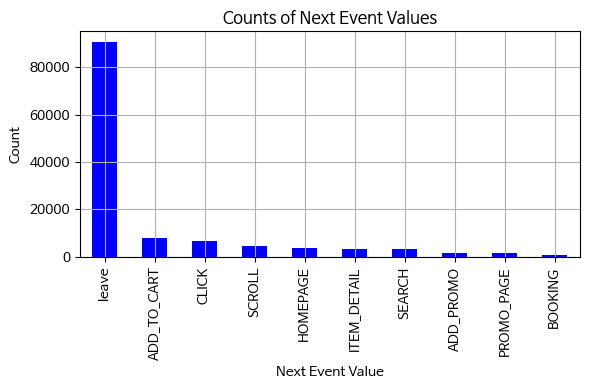

In [36]:
# next_event 컬럼 값의 데이터 수를 카운트
next_event_counts = filtered_df['next_event'].value_counts()

# 그래프 생성
plt.figure(figsize=(6, 4))
next_event_counts.plot(kind='bar', color='b')

plt.title('Counts of Next Event Values')
plt.xlabel('Next Event Value')
plt.ylabel('Count')

plt.grid(True)
plt.tight_layout()

plt.show()

In [37]:
bekas_data['used'] = '1'

In [38]:
bekas_data.head()

,new_session_id,event_name,event_time,event_id,product_id,payment_status,search_keywords,session_t,session_id,event_time2,year,month,day,next_event,used
152,00007415-e0e7-4a33-95e8-5bc749016876_24,SEARCH,2022-07-24 13:16:37.038087+00:00,e599d7c6-cc51-407b-b8c5-20545cce6cbd,0,NaN,Bekas,0 days 00:04:19,00007415-e0e7-4a33-95e8-5bc749016876,2022-07-24 13:16:37.038087+00:00,2022,7,24,BOOKING,1
192,0000b1a6-8dca-4fb3-b1db-ccde1791a330_47,SEARCH,2021-02-08 06:31:46.386424+00:00,bf979aa8-67f2-4639-adfb-6cddbf25dccb,0,NaN,Bekas,0 days 00:00:00,0000b1a6-8dca-4fb3-b1db-ccde1791a330,2021-02-08 06:31:46.386424+00:00,2021,2,8,leave,1
313,00011e77-643b-49ba-b09d-c5a64f7683b4_150,SEARCH,2018-05-25 22:40:31.211903+00:00,7acacdd8-9d65-4d51-9ac0-3d828fd86b6d,0,NaN,Bekas,0 days 02:53:07,00011e77-643b-49ba-b09d-c5a64f7683b4,2018-05-25 22:40:31.211903+00:00,2018,5,25,ADD_TO_CART,1
387,00013ac1-f66e-492c-ac04-4e0f1ecf2ff8_184,SEARCH,2020-02-13 03:41:13.777605+00:00,46290a42-6762-4eaa-8eef-c69bdb3bd413,0,NaN,Bekas,0 days 00:00:00,00013ac1-f66e-492c-ac04-4e0f1ecf2ff8,2020-02-13 03:41:13.777605+00:00,2020,2,13,leave,1
390,00013ac1-f66e-492c-ac04-4e0f1ecf2ff8_187,SEARCH,2020-02-13 14:30:48.777605+00:00,ce57b770-5552-44f1-bff8-1d6e37e24118,0,NaN,Bekas,0 days 00:00:00,00013ac1-f66e-492c-ac04-4e0f1ecf2ff8,2020-02-13 14:30:48.777605+00:00,2020,2,13,leave,1


In [39]:
click_tt = bekas_data.copy()

In [40]:
click_tt.head()

,new_session_id,event_name,event_time,event_id,product_id,payment_status,search_keywords,session_t,session_id,event_time2,year,month,day,next_event,used
152,00007415-e0e7-4a33-95e8-5bc749016876_24,SEARCH,2022-07-24 13:16:37.038087+00:00,e599d7c6-cc51-407b-b8c5-20545cce6cbd,0,NaN,Bekas,0 days 00:04:19,00007415-e0e7-4a33-95e8-5bc749016876,2022-07-24 13:16:37.038087+00:00,2022,7,24,BOOKING,1
192,0000b1a6-8dca-4fb3-b1db-ccde1791a330_47,SEARCH,2021-02-08 06:31:46.386424+00:00,bf979aa8-67f2-4639-adfb-6cddbf25dccb,0,NaN,Bekas,0 days 00:00:00,0000b1a6-8dca-4fb3-b1db-ccde1791a330,2021-02-08 06:31:46.386424+00:00,2021,2,8,leave,1
313,00011e77-643b-49ba-b09d-c5a64f7683b4_150,SEARCH,2018-05-25 22:40:31.211903+00:00,7acacdd8-9d65-4d51-9ac0-3d828fd86b6d,0,NaN,Bekas,0 days 02:53:07,00011e77-643b-49ba-b09d-c5a64f7683b4,2018-05-25 22:40:31.211903+00:00,2018,5,25,ADD_TO_CART,1
387,00013ac1-f66e-492c-ac04-4e0f1ecf2ff8_184,SEARCH,2020-02-13 03:41:13.777605+00:00,46290a42-6762-4eaa-8eef-c69bdb3bd413,0,NaN,Bekas,0 days 00:00:00,00013ac1-f66e-492c-ac04-4e0f1ecf2ff8,2020-02-13 03:41:13.777605+00:00,2020,2,13,leave,1
390,00013ac1-f66e-492c-ac04-4e0f1ecf2ff8_187,SEARCH,2020-02-13 14:30:48.777605+00:00,ce57b770-5552-44f1-bff8-1d6e37e24118,0,NaN,Bekas,0 days 00:00:00,00013ac1-f66e-492c-ac04-4e0f1ecf2ff8,2020-02-13 14:30:48.777605+00:00,2020,2,13,leave,1


In [41]:
dfdf.head().T

,0,1,2,3,4
new_session_id,00001f29-3ede-4445-95f0-0178934e32ba_1,00001f29-3ede-4445-95f0-0178934e32ba_2,00001f29-3ede-4445-95f0-0178934e32ba_2,00001f29-3ede-4445-95f0-0178934e32ba_3,00001f29-3ede-4445-95f0-0178934e32ba_4
event_name,HOMEPAGE,ADD_TO_CART,HOMEPAGE,CLICK,CLICK
event_time,2019-05-17 11:51:52.276396+00:00,2019-05-17 19:54:53.276396+00:00,2019-05-17 19:55:12.276396+00:00,2019-05-18 03:58:25.276396+00:00,2019-05-18 12:02:44.276396+00:00
event_id,51793173-664c-4557-8a06-fc37587bea3d,517b331c-4296-4772-a1a2-9bf7500a5570,2c0581d2-3185-4172-87ea-795ee26a4d0a,81982a1d-5562-44e8-8b1d-1c3366434c5e,6f7980bf-dce4-4b1e-9ffa-5c37499c4dc7
product_id,0,33855,0,0,0
payment_status,NaN,NaN,NaN,NaN,NaN
search_keywords,NaN,NaN,NaN,NaN,NaN
session_t,0 days 00:00:00,0 days 00:00:19,0 days 00:00:19,0 days 00:00:00,0 days 00:00:00
session_id,00001f29-3ede-4445-95f0-0178934e32ba,00001f29-3ede-4445-95f0-0178934e32ba,00001f29-3ede-4445-95f0-0178934e32ba,00001f29-3ede-4445-95f0-0178934e32ba,00001f29-3ede-4445-95f0-0178934e32ba
event_time2,2019-05-17 11:51:52.276396+00:00,2019-05-17 19:54:53.276396+00:00,2019-05-17 19:55:12.276396+00:00,2019-05-18 03:58:25.276396+00:00,2019-05-18 12:02:44.276396+00:00


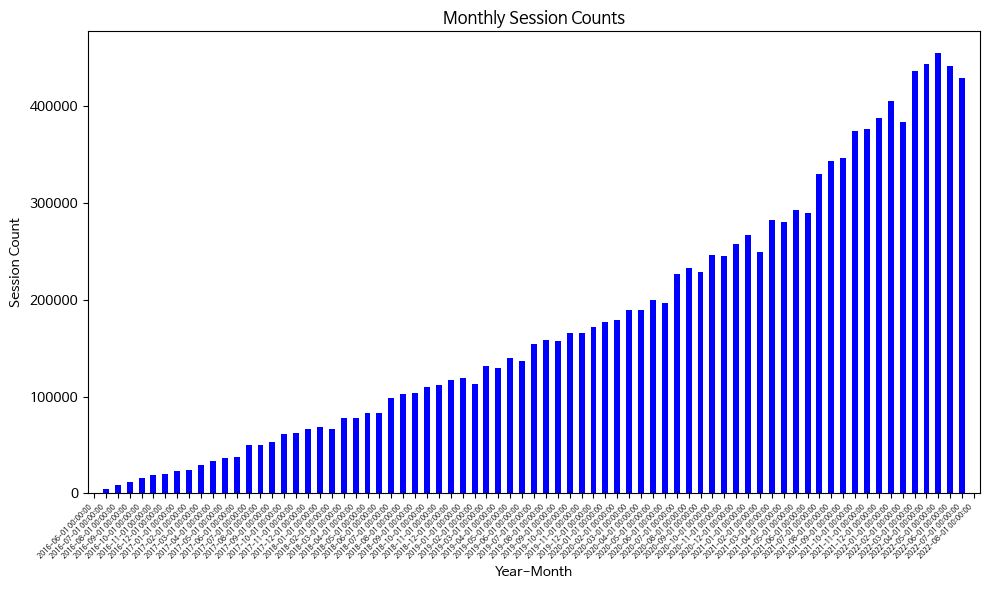

In [42]:
# 년도와 월을 결합하여 새로운 'year_month' 컬럼 생성
dfdf['year_month'] = dfdf['year'].astype(str) + '-' + dfdf['month'].astype(str)

# 년도와 월을 기준으로 정렬
dfdf['year_month'] = pd.to_datetime(dfdf['year_month'])
dfdf = dfdf.sort_values('year_month')

# 년도 월별 세션 수 계산
session_counts = dfdf.groupby('year_month')['new_session_id'].count()

# 그래프 생성
plt.figure(figsize=(10, 6))
session_counts.plot(kind='bar', color='blue')
plt.title('Monthly Session Counts')
plt.xlabel('Year-Month')
plt.ylabel('Session Count')
plt.xticks(rotation=45, ha='right', fontsize=5)
plt.tight_layout()
plt.show()

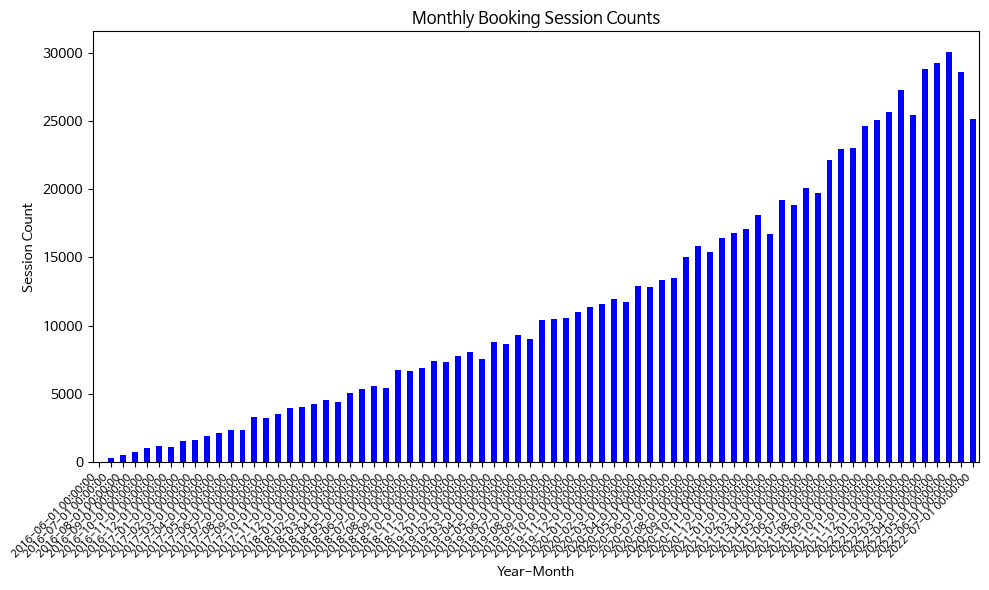

In [43]:
# 필요한 데이터만 추출 (event_name이 'BOOKING'인 데이터)
dfdf = dfdf[dfdf['event_name'] == 'BOOKING']

# 년도와 월을 결합하여 새로운 'year_month' 컬럼 생성
dfdf['year_month'] = dfdf['year'].astype(str) + '-' + dfdf['month'].astype(str)

# 년도와 월을 기준으로 정렬
dfdf['year_month'] = pd.to_datetime(dfdf['year_month'])
dfdf = dfdf.sort_values('year_month')

# 년도 월별 세션 수 계산
session_counts = dfdf.groupby('year_month')['new_session_id'].count()

# 그래프 생성
plt.figure(figsize=(10, 6))
session_counts.plot(kind='bar', color='blue')
plt.title('Monthly Booking Session Counts')
plt.xlabel('Year-Month')
plt.ylabel('Session Count')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.tight_layout()
plt.show()

In [44]:
# product 분석을 위해 불필요한 컬럼 삭제
#click_tt.drop(columns=['new_session_id','event_name', 'product_id', 'payment_status',
#'search_keywords', 'session_t', 'event_time2', 'year', 'month', 'next_event'], inplace=True)

In [45]:
#click_tt.to_csv('click_tt.csv',index = False)